# Data Description
- ID: ID Number of Customers.
- Warehouse block:- The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
- Mode of shipment:-The Company Ships the products in multiple way such as Ship, Flight and Road.
- Customer care calls:- The number of calls made from enquiry for enquiry of the shipment.
- Customer rating:- The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
- Cost of the product-: Cost of the Product in US Dollars.
- Prior purchases:- The Number of Prior Purchase.
- Product importance:- The company has categorized the product in the various parameter such as low, medium, high.
- Gender:- Male and Female.
- Discount offered:- Discount offered on that specific product.
- Weight in gms:- It is the weight in grams.
- Reached on time:- It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.

# importing libraries,modules and loading data

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score






plt.style.use('fivethirtyeight')

In [3]:
data=pd.read_csv('Train.csv')
data.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [4]:
data.shape

(10999, 12)

In [5]:
data.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
data.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
#detail information about unique elements
em={'columns':[],'unique elements':[],'number of unique elements':[]}
for col in data.columns:
    un=data[col].unique()
    num=data[col].nunique()
    em['columns'].append(col)
    em['unique elements'].append(un)
    em['number of unique elements'].append(num)
pd.DataFrame(em)

,columns,unique elements,number of unique elements
0,ID,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",10999
1,Warehouse_block,"[D, F, A, B, C]",5
2,Mode_of_Shipment,"[Flight, Ship, Road]",3
3,Customer_care_calls,"[4, 2, 3, 5, 6, 7]",6
4,Customer_rating,"[2, 5, 3, 1, 4]",5
5,Cost_of_the_Product,"[177, 216, 183, 176, 184, 162, 250, 233, 150, ...",215
6,Prior_purchases,"[3, 2, 4, 6, 5, 7, 10, 8]",8
7,Product_importance,"[low, medium, high]",3
8,Gender,"[F, M]",2
9,Discount_offered,"[44, 59, 48, 10, 46, 12, 3, 11, 29, 32, 1, 43,...",65


In [9]:
#droping unwanted column using drop method

data.drop('ID',axis=1,inplace=True)


# Correlation between feature and target

<AxesSubplot:>

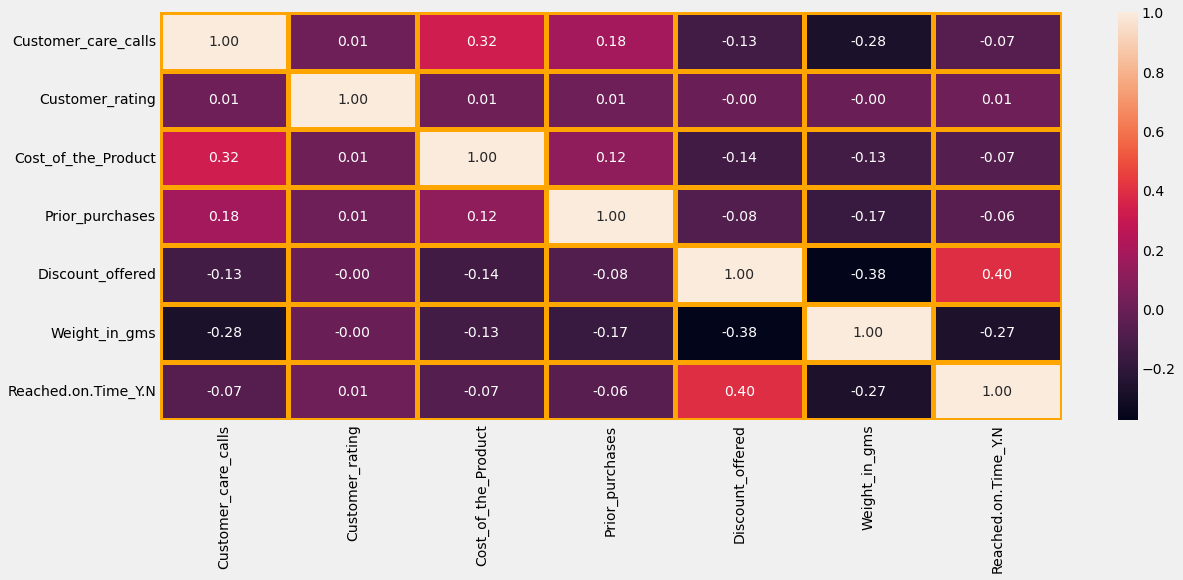

In [10]:
#heatmap of checking correlation between features and target
plt.figure(figsize=(18,7))
sns.heatmap(data.corr(),annot=True,linewidths=5,linecolor='orange',fmt = '0.2f')

# Data visualisation

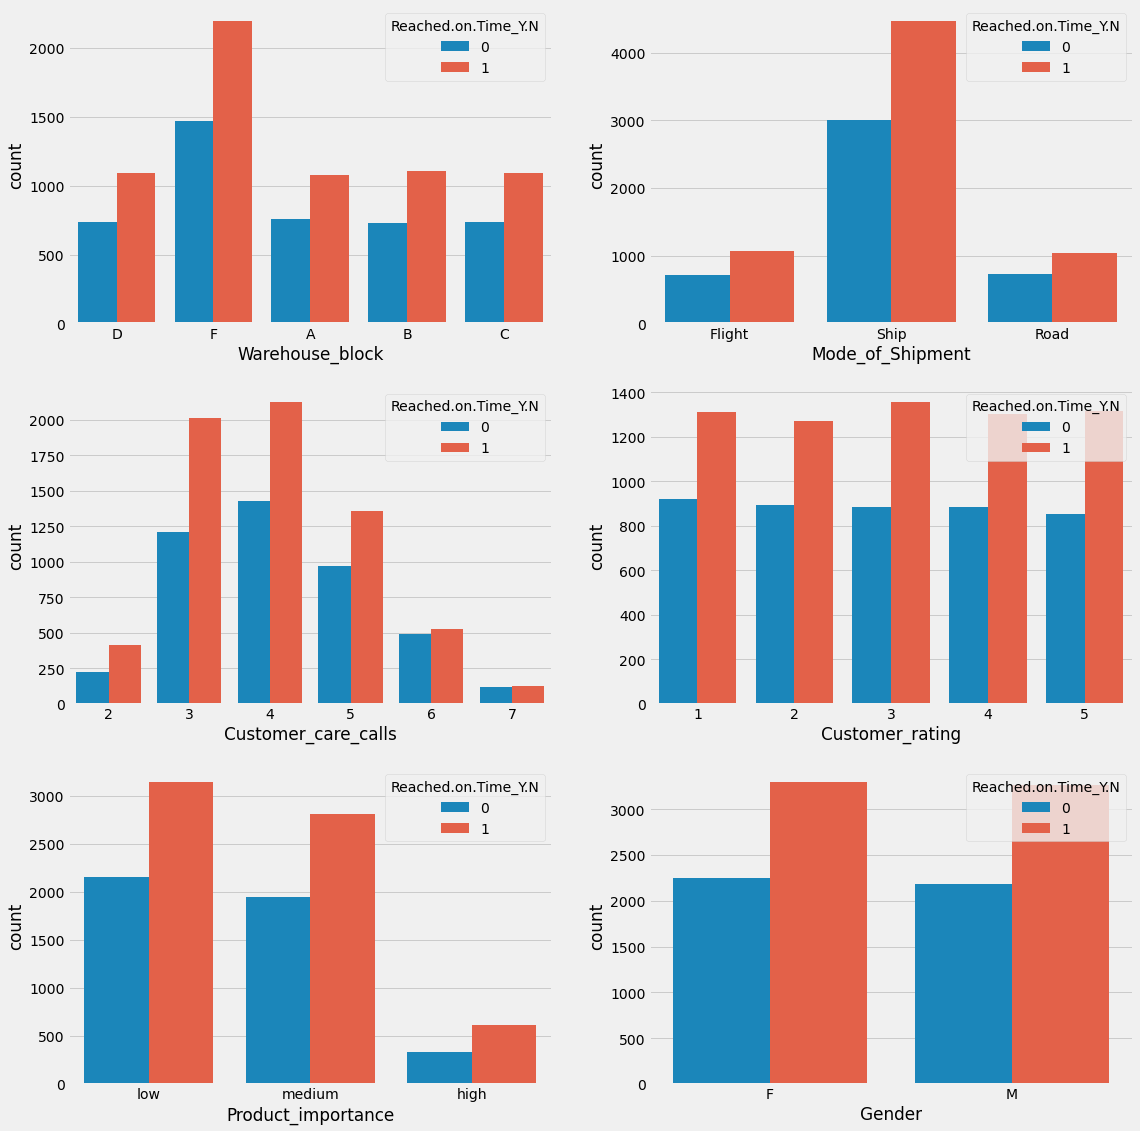

In [11]:
list=['Warehouse_block','Mode_of_Shipment','Customer_care_calls',
      'Customer_rating','Product_importance','Gender']
plt.figure(figsize=(17,25))
for i,col in enumerate(list):
    plt.subplot(4,2,i+1)
    sns.countplot(data[col],hue=data['Reached.on.Time_Y.N'])
plt.show()

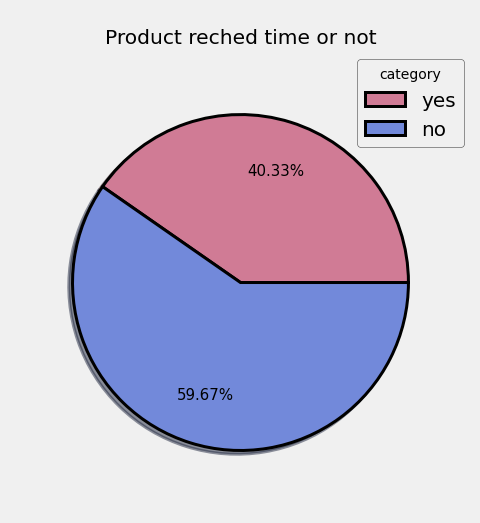

In [12]:
#reached on delivery time or not
plt.figure(figsize=(9,8))
wedges,text,autotxt=plt.pie([data['Reached.on.Time_Y.N'].value_counts()[0],
                             data['Reached.on.Time_Y.N'].value_counts()[1]],
        textprops=dict(size=15,color='black'),autopct='%.2f%%',pctdistance=0.7,
        wedgeprops=dict(edgecolor='black',linewidth=3),
        shadow=True,
        radius=0.9,
        colors=['#d07b95','#7289da'])
plt.legend(wedges,labels=['yes','no'],title='category',loc='upper right',
           edgecolor='black',fontsize=20)
plt.title('\nProduct reched time or not')
plt.show()

# encoding categorical variables

In [13]:
# encoding categorical variables

data['Warehouse_block'] = data['Warehouse_block'].map({'A' : 0, 'B': 1, 'C': 2, 'D':3, 'F': 4})
data['Mode_of_Shipment'] = data['Mode_of_Shipment'].map({'Flight' : 0, 'Ship': 1, 'Road': 2})
data['Product_importance'] = data['Product_importance'].map({'low' : 0, 'medium': 1, 'high': 2})
data['Gender'] = data['Gender'].apply(lambda val: 1 if val == 'M' else 0)

In [14]:
data.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [15]:
#droping unwanted columns for training
data=data.drop(['Cost_of_the_Product','Discount_offered'],axis=1)

In [16]:
# creating features and label

x = data.iloc[:, :-1]
y= data.iloc[:, -1]

# splitting and scaling data

In [17]:
#splitting data into trainning and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=10)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(8249, 8)
(2750, 8)
(8249,)
(2750,)


In [19]:
#scaling datas using standardscaling
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

In [20]:
x_train

array([[-0.89757866,  1.78764761, -0.05756416, ..., -0.93713671,
        -0.996249  , -1.03154749],
       [ 1.11386562,  0.01376271, -0.05756416, ...,  0.6226778 ,
        -0.996249  ,  0.40595714],
       [-0.89757866,  0.01376271, -0.93528462, ...,  0.6226778 ,
        -0.996249  ,  0.91122472],
       ...,
       [ 0.44338419,  1.78764761, -0.93528462, ..., -0.93713671,
        -0.996249  , -1.42854344],
       [-0.89757866,  0.01376271, -0.05756416, ..., -0.93713671,
        -0.996249  ,  1.12532115],
       [ 1.11386562,  0.01376271, -0.93528462, ...,  0.6226778 ,
         1.00376512, -1.15694683]])

# Hypertuning parameter

In [21]:
#hypertuning parameter 
t_model={'Randomforest':{'model':RandomForestClassifier(),'param':{'n_estimators':[1,5,10,15]}},
            'Decisiontree':{'model':DecisionTreeClassifier(),'param':{'max_depth':[4,5,7,10]}},
             'Logisticregression':{'model':LogisticRegression(),'param':{'C':[1,5,10]}},
            'Adaboosting':{'model':AdaBoostClassifier(),'param':{'n_estimators':[10,40,50,70],
                     'base_estimator':[None],'learning_rate':[0.2,0.3,0.5],'random_state':[20,30,40,100]}}}
             
             

In [22]:
models=['Logisticregression','Randomforest','Decisiontree','Adaboosting']
scores=[]
for i in models:
    mp=t_model[i]
    gds=GridSearchCV(mp['model'],mp['param'],return_train_score=True,cv=5)
    gds.fit(x_train,y_train)
    scores.append({'model':i,'best_score':gds.best_score_,'best_parameter':gds.best_params_})
    
    
    
    

In [23]:
df=pd.DataFrame(scores)
df


,model,best_score,best_parameter
0,Logisticregression,0.631834,{'C': 1}
1,Randomforest,0.639595,{'n_estimators': 10}
2,Decisiontree,0.669294,{'max_depth': 4}
3,Adaboosting,0.670264,"{'base_estimator': None, 'learning_rate': 0.2,..."


In [24]:
#here we get worst score

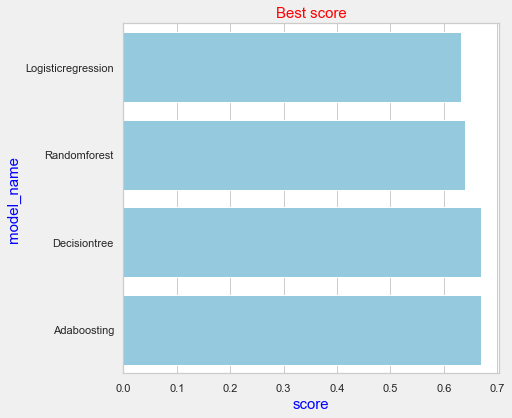

In [25]:
plt.figure(figsize=(6,6))
sns.set(style="whitegrid")
sns.barplot(y='model',x='best_score',data=df,color='skyblue')

plt.ylabel('model_name',fontdict={'fontsize':15},color='blue')
plt.xlabel('score',fontdict={'fontsize':15},color='blue')
plt.title('Best score',fontdict={'fontsize':15},color='red')
plt.show()

# Decision Tree

In [54]:
model=DecisionTreeClassifier(max_depth=2)
model.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=2)

# Confusin matrix,classification report and accuracy score

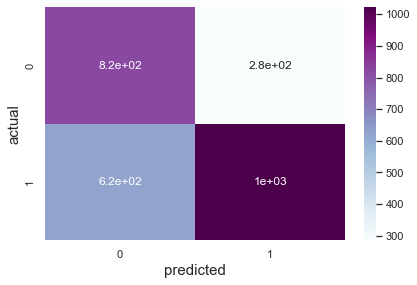

In [65]:
y_pred=model.predict(x_test)
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='BuPu')
plt.ylabel('actual',fontdict={'fontsize':15})
plt.xlabel('predicted',fontdict={'fontsize':15})
plt.show()

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.74      0.64      1106
           1       0.78      0.62      0.69      1644

    accuracy                           0.67      2750
   macro avg       0.68      0.68      0.67      2750
weighted avg       0.70      0.67      0.67      2750



In [57]:
print(accuracy_score(y_test,y_pred))

0.6705454545454546


In [59]:
from sklearn import tree

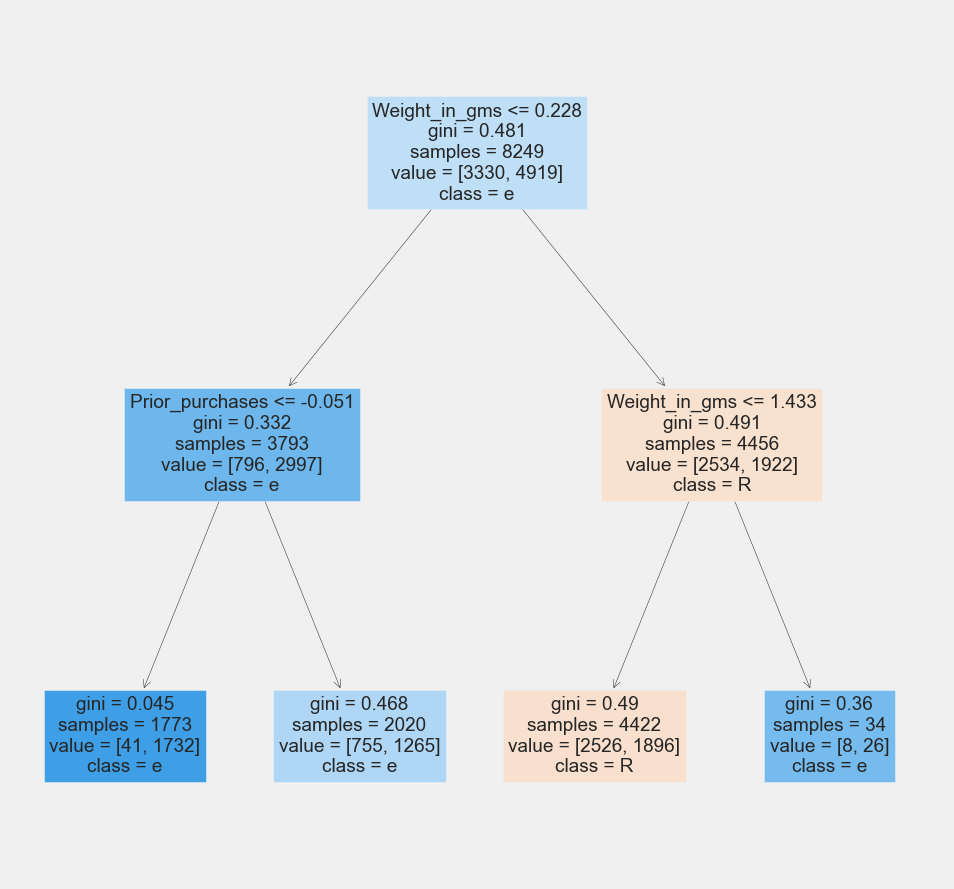

In [69]:
fig=plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=x.columns,class_names='Reached.on.Time_Y.N',filled=True)#feature_names means x le columns an(target oyivakkuka)
plt.show()